# Perform a time series Analysis on both the data for Telangana And build a Machine Learning Model That Predicts The Number of Visitors That will Visit a certain District A at a given time.
this is for learning

first Import the nesesary libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

Load the two data sets and keep them in a list called data

In [59]:
import gdown
import pandas as pd

def load_data(link):
    # Extract file ID from the provided link
    file_id = link.split('/')[-2]

    # Generate direct download link
    csv_link = f'https://drive.google.com/uc?id={file_id}'

    # Download the CSV file
    gdown.download(csv_link, f'{file_id}.csv', quiet=False)

    # Read the CSV file
    df = pd.read_csv(f'{file_id}.csv', encoding='utf-8')

    return df

# Use the provided links
domestic_link = 'https://drive.google.com/file/d/1dVhU2uuuMG2k0QbB3_3zXIDBBrd87cT_/view?usp=sharing'
foreign_link = 'https://drive.google.com/file/d/18uVvtt618Nx7TPDflGCc4Vv7GdJAsAo0/view?usp=sharing'

# Load the data into a list
data = [load_data(domestic_link), load_data(foreign_link)]

# Access the data as data[0] for domestic and data[1] for foreign
print("Domestic Data:")
print(data[0].head())

print("\nForeign Data:")
print(data[1].head())


Downloading...
From: https://drive.google.com/uc?id=1dVhU2uuuMG2k0QbB3_3zXIDBBrd87cT_
To: /content/1dVhU2uuuMG2k0QbB3_3zXIDBBrd87cT_.csv
100%|██████████| 69.9k/69.9k [00:00<00:00, 70.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=18uVvtt618Nx7TPDflGCc4Vv7GdJAsAo0
To: /content/18uVvtt618Nx7TPDflGCc4Vv7GdJAsAo0.csv
100%|██████████| 65.5k/65.5k [00:00<00:00, 99.5MB/s]

Domestic Data:
   Unnamed: 0  district        date     month  year  visitors
0           0  Adilabad  2016-01-01   January  2016    792136
1           1  Adilabad  2016-01-02  February  2016    937820
2           2  Adilabad  2016-01-03     March  2016    582946
3           3  Adilabad  2016-01-04     April  2016    341948
4           4  Adilabad  2016-01-05       May  2016    252887

Foreign Data:
   Unnamed: 0  district        date     month  year  visitors
0           0  Adilabad  2016-01-01   January  2016         2
1           1  Adilabad  2016-01-02  February  2016         0
2           2  Adilabad  2016-01-03     March  2016         2
3           3  Adilabad  2016-01-04     April  2016         0
4           4  Adilabad  2016-01-05       May  2016         0


In [60]:
data =[data[0],data[1]]
data_name = ('Domestic','Foreign')

In [61]:
#lets view the data types
for i in range(len(data)):
  data[i] = data[i].drop('Unnamed: 0', axis =1)
  print (data[i].dtypes)
  print(data[i].head())

district    object
date        object
month       object
year         int64
visitors     int64
dtype: object
   district        date     month  year  visitors
0  Adilabad  2016-01-01   January  2016    792136
1  Adilabad  2016-01-02  February  2016    937820
2  Adilabad  2016-01-03     March  2016    582946
3  Adilabad  2016-01-04     April  2016    341948
4  Adilabad  2016-01-05       May  2016    252887
district    object
date        object
month       object
year         int64
visitors     int64
dtype: object
   district        date     month  year  visitors
0  Adilabad  2016-01-01   January  2016         2
1  Adilabad  2016-01-02  February  2016         0
2  Adilabad  2016-01-03     March  2016         2
3  Adilabad  2016-01-04     April  2016         0
4  Adilabad  2016-01-05       May  2016         0


In [62]:
#changing the data type of the year column
for i in range(len(data)):
  data[i]['year'] = data[i]['year'].astype(str)
  print (data[i].dtypes)

district    object
date        object
month       object
year        object
visitors     int64
dtype: object
district    object
date        object
month       object
year        object
visitors     int64
dtype: object


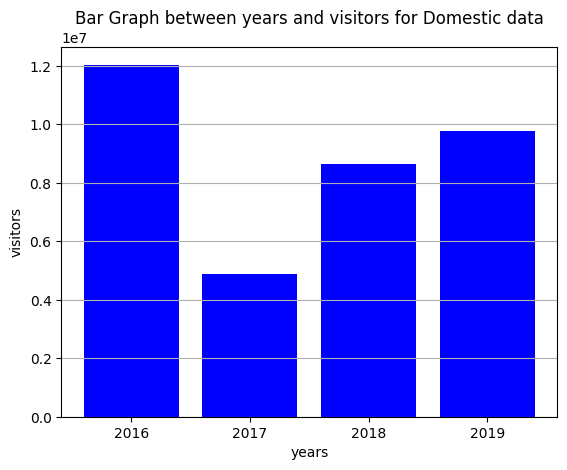

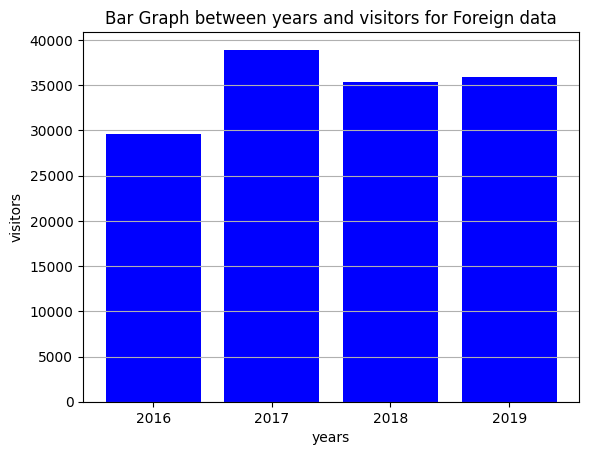

<Figure size 640x480 with 0 Axes>

In [63]:
#Lets Visualize the columns i want to analyse / build my model using this are the year and visitors and columns
def bar_year_visitors(data,data_name):
  # Plot the bar graph
  for i in range(len(data)):
    plt.bar(data[i]['year'], data[i]['visitors'], color='b')

    # Customize the plot
    plt.title(f'Bar Graph between years and visitors for {data_name[i]} data')
    plt.xlabel('years')
    plt.ylabel('visitors')
    plt.grid(axis='y')

    # Show the plot
    plt.show()
    plt.clf()
bar_year_visitors(data,data_name)

## To avoid changing the original data when building this models.
we will employ the method of copying the data frames and using the copys of the data frame for each model building.

Also we will use functions in building this models and classes

in that at the end of this model you will have sections to input your inputs and you get the output clearly without too much codes

I will also try to build an interface when using this Two models

In [64]:
#lets coppy the data so to avoid changing the data when performing some tests
data_copy =[]
for i in range(len(data)):
  data_copy.append(data[i].copy())
data_copy[0].head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-01-02,February,2016,937820
2,Adilabad,2016-01-03,March,2016,582946
3,Adilabad,2016-01-04,April,2016,341948
4,Adilabad,2016-01-05,May,2016,252887


### 1. Finding the relationship between the visitors and district they visit
 which district has the higest posibility of being visited over the years

In [65]:
#First lets drop  the date and month column
for i in range(len(data)):
  data_copy[i] = data_copy[i].drop(['date','month'], axis = 1)

data_copy[1].head()

,district,year,visitors
0,Adilabad,2016,2
1,Adilabad,2016,0
2,Adilabad,2016,2
3,Adilabad,2016,0
4,Adilabad,2016,0


In [66]:
data_copy[0].head()

,district,year,visitors
0,Adilabad,2016,792136
1,Adilabad,2016,937820
2,Adilabad,2016,582946
3,Adilabad,2016,341948
4,Adilabad,2016,252887


In [67]:
#convert the year column to integers
for i in range(len(data)):
  data_copy[i]['year'] = data_copy[i]['year'].astype(int)

In [90]:
# Calculate for domestic visitors
def mean_visitors_count(data_copy,data_name):
  # Calculate the mean visitor count for each district over the four years
  mean_visitor_counts = data_copy.groupby(['district'])['visitors'].mean().reset_index()

  # Find the district with the largest mean visitor count
  district_with_largest_visitors = mean_visitor_counts[mean_visitor_counts['visitors'] == mean_visitor_counts['visitors'].max()]

  # Find the district with the smallest mean visitor count
  district_with_smallest_visitors = mean_visitor_counts[mean_visitor_counts['visitors'] == mean_visitor_counts['visitors'].min()]

  visitors_count = [district_with_largest_visitors, district_with_smallest_visitors]
  return visitors_count



In [91]:
domestic_visitors = mean_visitors_count(data_copy[0],data_name[0])

print(f"District with the largest mean {data_name[0]} visitors:")
print(domestic_visitors[0])

print(f"\nDistrict with the smallest mean {data_name[0]} visitors:")
print(domestic_visitors[1])

District with the largest mean Domestic visitors:
    district      visitors
2  Hyderabad  1.747937e+06

District with the smallest mean Domestic visitors:
       district  visitors
15     Medchal        0.0
24  Ranga Reddy       0.0
27     Suryapet       0.0
28    Vikarabad       0.0


In [92]:
domestic_visitors = mean_visitors_count(data_copy[1],data_name[1])

print(f"District with the largest mean {data_name[1]} visitors:")
print(domestic_visitors[0])

print(f"\nDistrict with the smallest mean {data_name[1]} visitors:")
print(domestic_visitors[1])

District with the largest mean Foreign visitors:
    district      visitors
2  Hyderabad  21768.708333

District with the smallest mean Foreign visitors:
                  district  visitors
1    Bhadradri Kothagudem        0.0
3                 Jagtial        0.0
7               Kamareddy        0.0
8              Karimnagar        0.0
9                  Khammam       0.0
10  Komaram Bheem Asifabad       0.0
11            Mahabubabad        0.0
14                  Medak        0.0
15                Medchal        0.0
18                Nalgonda       0.0
22              Peddapalli       0.0
23       Rajanna Sircilla        0.0
24             Ranga Reddy       0.0
25             Sangareddy        0.0
26                Siddipet       0.0
27                Suryapet       0.0
28               Vikarabad       0.0
29             Wanaparthy        0.0
32         Yadadri Bhongir       0.0


#the time series analysis
even thow the analysis failed due tu lack of sufficent data I still learnt how to perform the analysis.

In [101]:
#import the statsmodel
import statsmodels.api as sm

def time_analysis_for_5_years(data):
  # Convert 'year' column to datetime
  data['year'] = pd.to_datetime(data['year'], format='%Y')

  # Calculate summary statistics for each district
  summary_stats = data.groupby('district')['visitors'].describe()

  # Identify the top and lowest districts based on visitor counts
  top_district = summary_stats[summary_stats['mean'] == summary_stats['mean'].max()].index[0]
  lowest_district = summary_stats[summary_stats['mean'] == summary_stats['mean'].min()].index[0]

  # Filter data for the top and lowest districts
  top_district_data = data[data['district'] == top_district]
  lowest_district_data = data[data['district'] == lowest_district]

  # Perform time series analysis and forecast for the top district
  top_district_historical_data = top_district_data.groupby('year')['visitors'].sum()
  top_district_historical_data = top_district_historical_data.asfreq('M', method='ffill')  # Resample to monthly
  top_district_model = sm.tsa.ARIMA(top_district_historical_data, order=(1, 1, 1))
  top_district_results = top_district_model.fit()
  top_district_forecast = top_district_results.forecast(steps=60)  # Forecast the next 5 years (60 months)

  # Perform time series analysis and forecast for the lowest district
  lowest_district_historical_data = lowest_district_data.groupby('year')['visitors'].sum()
  lowest_district_historical_data = lowest_district_historical_data.asfreq('M', method='ffill')  # Resample to monthly
  lowest_district_model = sm.tsa.ARIMA(lowest_district_historical_data, order=(1, 1, 1))
  lowest_district_results = lowest_district_model.fit()
  lowest_district_forecast = lowest_district_results.forecast(steps=60)  # Forecast the next 5 years (60 months)

  # Create a date range for the forecasts
  forecast_dates = pd.date_range(start=top_district_historical_data.index[-1], periods=61, freq='M')[1:]


  plt.figure(figsize=(12, 6))
  plt.plot(forecast_dates, top_district_forecast, label=f"Top District ({top_district})", marker = '*')
  plt.plot(forecast_dates, lowest_district_forecast, label=f"Lowest District ({lowest_district})", marker = '*')
  plt.xlabel('Date')
  plt.ylabel('Visitor Count Forecast')
  plt.title('Visitor Count Forecast for Top and Lowest Districts')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Print the forecasts for the top and lowest districts
  print(f"Forecast for the top district ({top_district}):")
  print(top_district_forecast)

  print(f"\nForecast for the lowest district ({lowest_district}):")
  print(lowest_district_forecast)


The Domestic Data


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


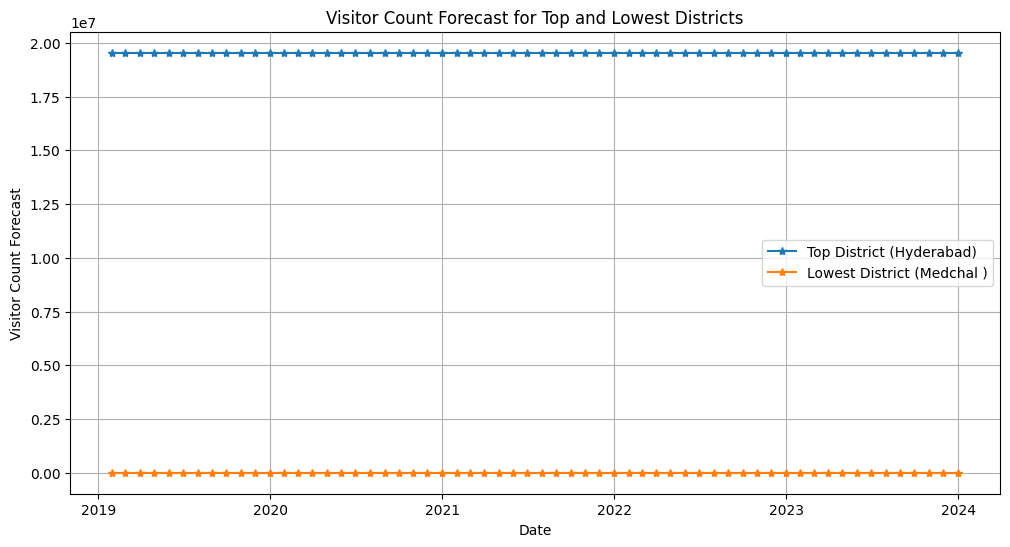

Forecast for the top district (Hyderabad):
2019-01-31    19543651.0
2019-02-28    19543651.0
2019-03-31    19543651.0
2019-04-30    19543651.0
2019-05-31    19543651.0
2019-06-30    19543651.0
2019-07-31    19543651.0
2019-08-31    19543651.0
2019-09-30    19543651.0
2019-10-31    19543651.0
2019-11-30    19543651.0
2019-12-31    19543651.0
2020-01-31    19543651.0
2020-02-29    19543651.0
2020-03-31    19543651.0
2020-04-30    19543651.0
2020-05-31    19543651.0
2020-06-30    19543651.0
2020-07-31    19543651.0
2020-08-31    19543651.0
2020-09-30    19543651.0
2020-10-31    19543651.0
2020-11-30    19543651.0
2020-12-31    19543651.0
2021-01-31    19543651.0
2021-02-28    19543651.0
2021-03-31    19543651.0
2021-04-30    19543651.0
2021-05-31    19543651.0
2021-06-30    19543651.0
2021-07-31    19543651.0
2021-08-31    19543651.0
2021-09-30    19543651.0
2021-10-31    19543651.0
2021-11-30    19543651.0
2021-12-31    19543651.0
2022-01-31    19543651.0
2022-02-28    19543651.0
2022-03

In [102]:
print('The Domestic Data')
time_analysis_for_5_years(data_copy[0])

The Foreign Data


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


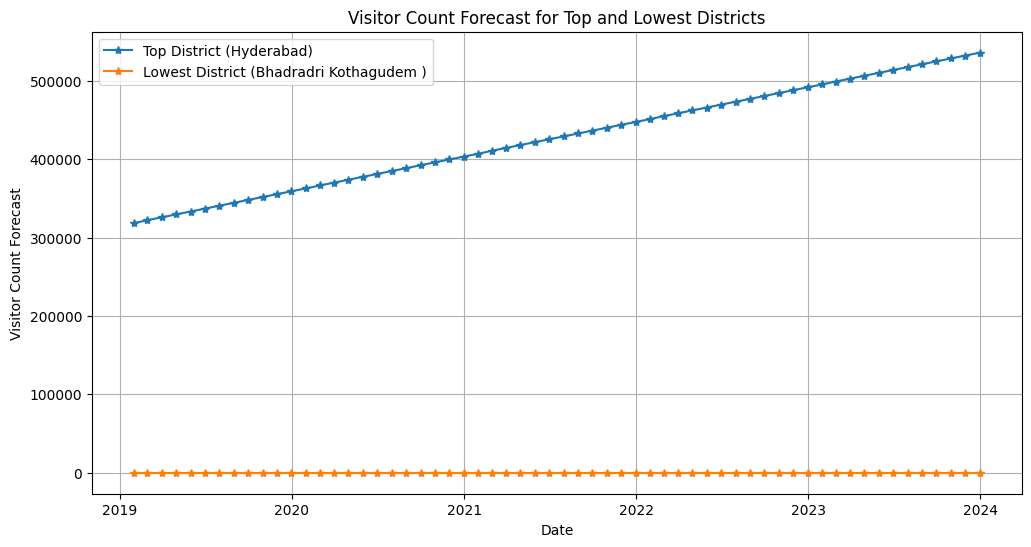

Forecast for the top district (Hyderabad):
2019-01-31    318479.137534
2019-02-28    322170.016521
2019-03-31    325860.636978
2019-04-30    329550.998923
2019-05-31    333241.102374
2019-06-30    336930.947350
2019-07-31    340620.533869
2019-08-31    344309.861948
2019-09-30    347998.931606
2019-10-31    351687.742861
2019-11-30    355376.295732
2019-12-31    359064.590235
2020-01-31    362752.626389
2020-02-29    366440.404213
2020-03-31    370127.923725
2020-04-30    373815.184942
2020-05-31    377502.187882
2020-06-30    381188.932564
2020-07-31    384875.419006
2020-08-31    388561.647226
2020-09-30    392247.617242
2020-10-31    395933.329072
2020-11-30    399618.782734
2020-12-31    403303.978246
2021-01-31    406988.915627
2021-02-28    410673.594894
2021-03-31    414358.016066
2021-04-30    418042.179160
2021-05-31    421726.084194
2021-06-30    425409.731188
2021-07-31    429093.120158
2021-08-31    432776.251123
2021-09-30    436459.124101
2021-10-31    440141.739110
2021-

In [103]:
print('The Foreign Data')
time_analysis_for_5_years(data_copy[1])